In [1]:
# for each of tile:
# convert the visium hd data to the baysor format
#

In [ ]:
from __future__ import annotations
import sys
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
# from stardist.models import StarDist2D
# Import the package from the src directory
import openslide
from skimage.color import rgb2gray
import cv2

from anndata import AnnData

cwd_path = Path.cwd()
root_path = cwd_path.parent



package_path = root_path / "src"

sys.path.append(str(package_path))

import CapybaraHD.process_histology.process_wsi as cp_process_wsi
import CapybaraHD.process_adata.read_adata as cp_read_adata
import CapybaraHD.map.map_wsi as cp_map_wsi


In [2]:
wsi_folder = Path('/pub/boyaz14/elvin_visium_hd/Capabarab_hd/data/wsi_scan')
cellranger_folder = Path('/dfs9/stanlewn-lab/share/Elvin_Tapestri/Visium_HD/WagenblastHD2/bings.mssm.edu/bings_mssm_edu/bings_omics/published_data/poddan01/external/elvin_wagenblast/WagenblastHD/WagenblastHD2/cellranger_output/ELWA02_FL3_0_v1')


slide_f, adata_folder = wsi_folder/'FL3.svs', cellranger_folder

elvin_fl3 = cp_read_adata.VisiumHDB2C(out_10x_folder=Path(adata_folder))

adata = elvin_fl3.get_um_adata(2)






The inferred 10x output name is ELWA02_FL3_0_v1
Loading square_002um data


anndata.py (1758): Variable names are not unique. To make them unique, call `.var_names_make_unique`.
anndata.py (1758): Variable names are not unique. To make them unique, call `.var_names_make_unique`.


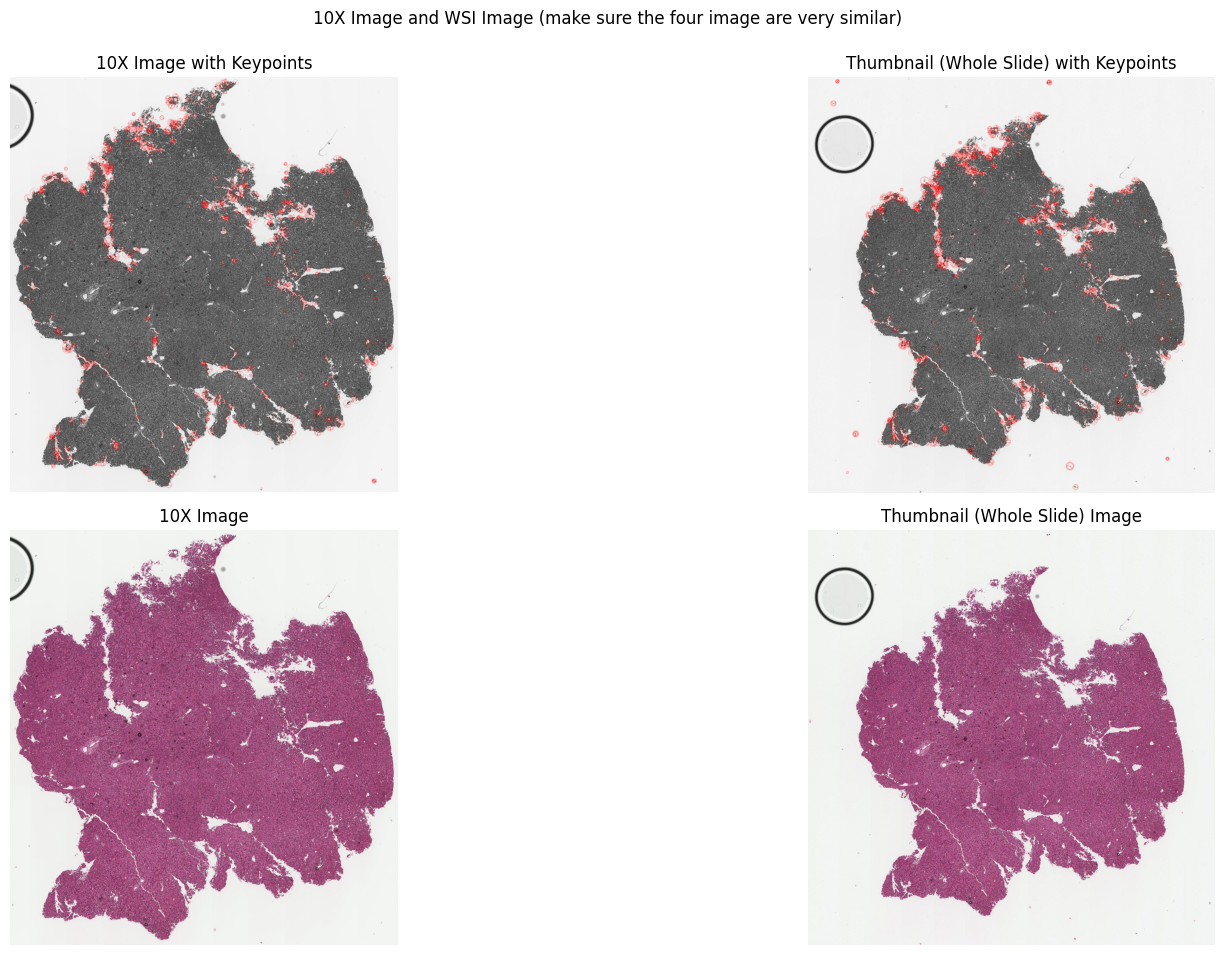

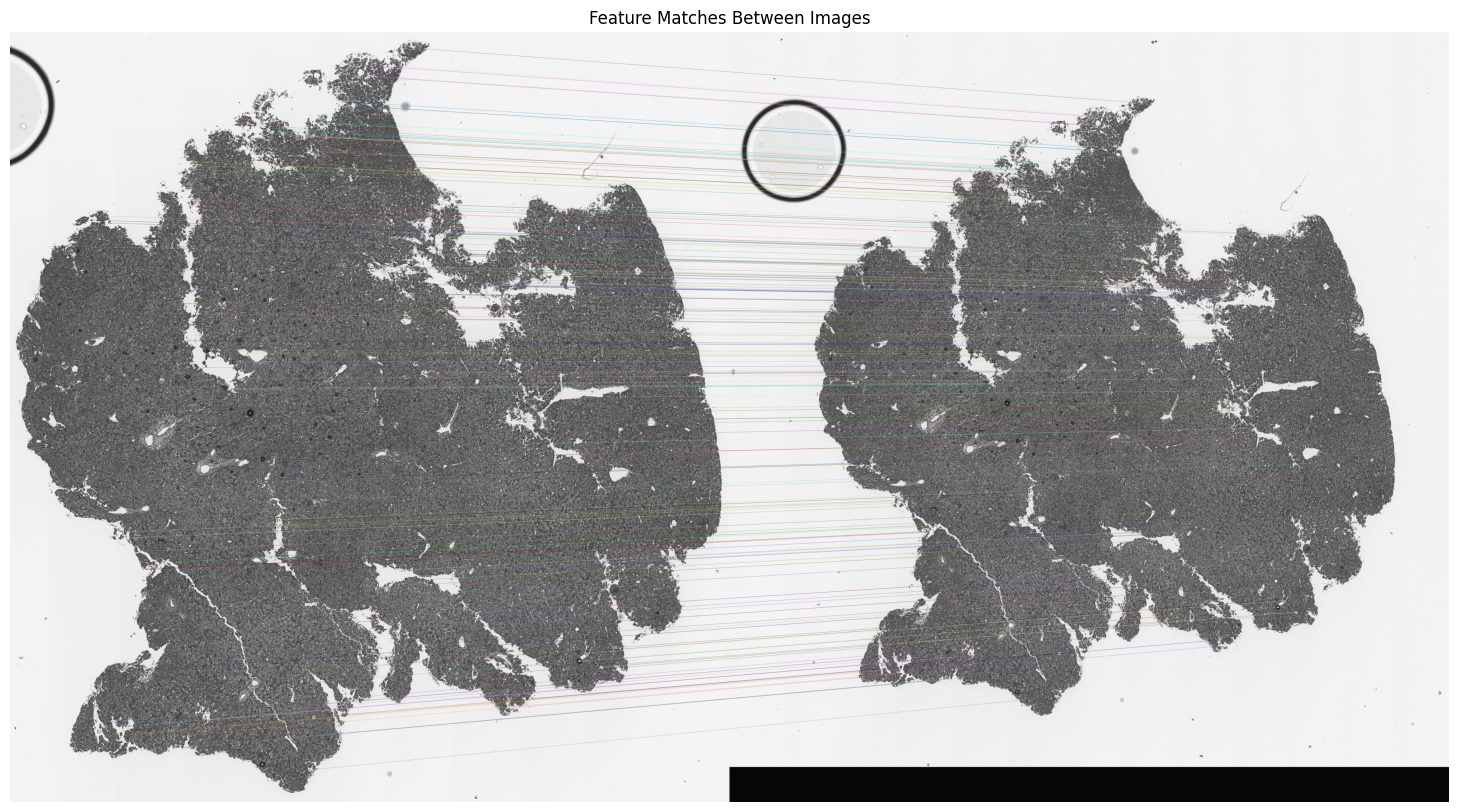

Homography matrix:
[[ 1.21542882e+00  1.46861919e-04 -7.58122535e+02]
 [-1.13797352e-04  1.21582534e+00 -5.47130399e+02]
 [-6.19709445e-08  6.21839777e-08  1.00000000e+00]]


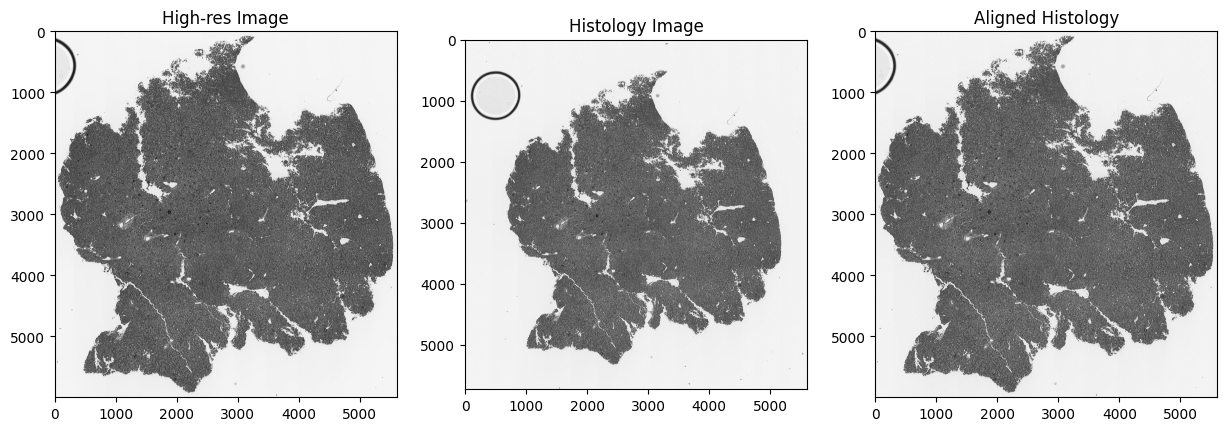

In [3]:
premaping = cp_map_wsi.PreprocessAdataImage(adata, slide_f)


In [4]:
vars(premaping)

{'adata': AnnData object with n_obs × n_vars = 4638180 × 18085
     obs: 'in_tissue', 'array_row', 'array_col', 'spatial_sample_id'
     var: 'gene_ids', 'feature_types', 'genome'
     uns: 'spatial'
     obsm: 'spatial',
 'wsi_slide': PosixPath('/pub/boyaz14/elvin_visium_hd/Capabarab_hd/data/wsi_scan/FL3.svs'),
 'adata_image': <PIL.Image.Image image mode=RGB size=5606x6000>,
 'slide': OpenSlide(PosixPath('/pub/boyaz14/elvin_visium_hd/Capabarab_hd/data/wsi_scan/FL3.svs')),
 'slide_thumbnail': <PIL.Image.Image image mode=RGB size=5606x5727>,
 'adata_gray': array([[242, 243, 245, ..., 244, 245, 245],
        [242, 243, 245, ..., 244, 245, 245],
        [242, 243, 244, ..., 244, 245, 245],
        ...,
        [245, 245, 245, ..., 245, 244, 244],
        [245, 245, 245, ..., 245, 244, 244],
        [245, 245, 245, ..., 244, 243, 243]], dtype=uint8),
 'thumbnail_gray': array([[243, 243, 243, ..., 245, 245, 246],
        [243, 243, 243, ..., 245, 245, 246],
        [243, 243, 243, ..., 245,

In [5]:
premaping.homography_matrix

array([[ 1.21542882e+00,  1.46861919e-04, -7.58122535e+02],
       [-1.13797352e-04,  1.21582534e+00, -5.47130399e+02],
       [-6.19709445e-08,  6.21839777e-08,  1.00000000e+00]])

In [ ]:
process_tile = ProcessTile(
    slide_f=histology_f,
)
analyze_folder = process_tile.analyze_folder

boundary_predictions_folder = analyze_folder / 'nucleus_predictions'
tiles_folder = analyze_folder / f'{analyze_folder.stem}_tiles'
debug_folder = analyze_folder / 'nucleus_predictions_debug'
map_cell_boundary_from_ultra_high_res_histology_to_adata.get_res_min_max_from_annotation_folder_files(boundary_predictions_folder)
map_cell_boundary_from_ultra_high_res_histology_to_adata.get_res_min_max_from_annotation_folder_files(tiles_folder)
# map_cell_boundary_from_ultra_high_res_histology_to_adata.get_res_min_max_from_annotation_folder_files(debug_folder,)
map_boundary_to_adata = map_cell_boundary_from_ultra_high_res_histology_to_adata(
    analyze_folder=analyze_folder,
    slide=slide,
    # slide_thumbnail=slide_thumbnail,
)

new_obs_column = 'cell_bounds'
default_value = 'not_detected'


adata.obs[new_obs_column] = default_value
# adata.obs['cell_bounds'] = 'not_detected'

map_cell_boundary_from_ultra_high_res_histology_to_adata.transfer_high_res_boundary_to_adata_obs_cell_bounds(

    *map_boundary_to_adata.one_example_tile_boundary_with_tile(idx=10),
    slide=slide,
    slide_thumbnail=slide_thumbnail,
    adata=adata,
    adata_image=adata_image,
    homoglaphy_matrix=h,
    new_obs_cell_bounds_variable_name=new_obs_column,
    default_cell_bounds=default_value,

)

boundary_files, tile_files = map_boundary_to_adata.get_all_boundary_tile_files()
# boundary_files, tile_files

map_cell_boundary_from_ultra_high_res_histology_to_adata.transfer_mutliple_high_res_boundary_to_adata_obs_cell_bounds(

    boundary_files,
    tile_files,
    slide,
    slide_thumbnail,
    adata,
    adata_image,
    h,
    save_adata_folder=analyze_folder,
    save_adata_suffix=elvin_fl3.out_10x_name,
    new_obs_cell_bounds_variable_name=new_obs_column,
    default_cell_bounds=default_value,
    plot_comprehensively_count=5,
    save_comprehensively_folder=analyze_folder / 'cell_bounds_plots_comprehensive_debug',
    force=True,
    # debug=True,
)

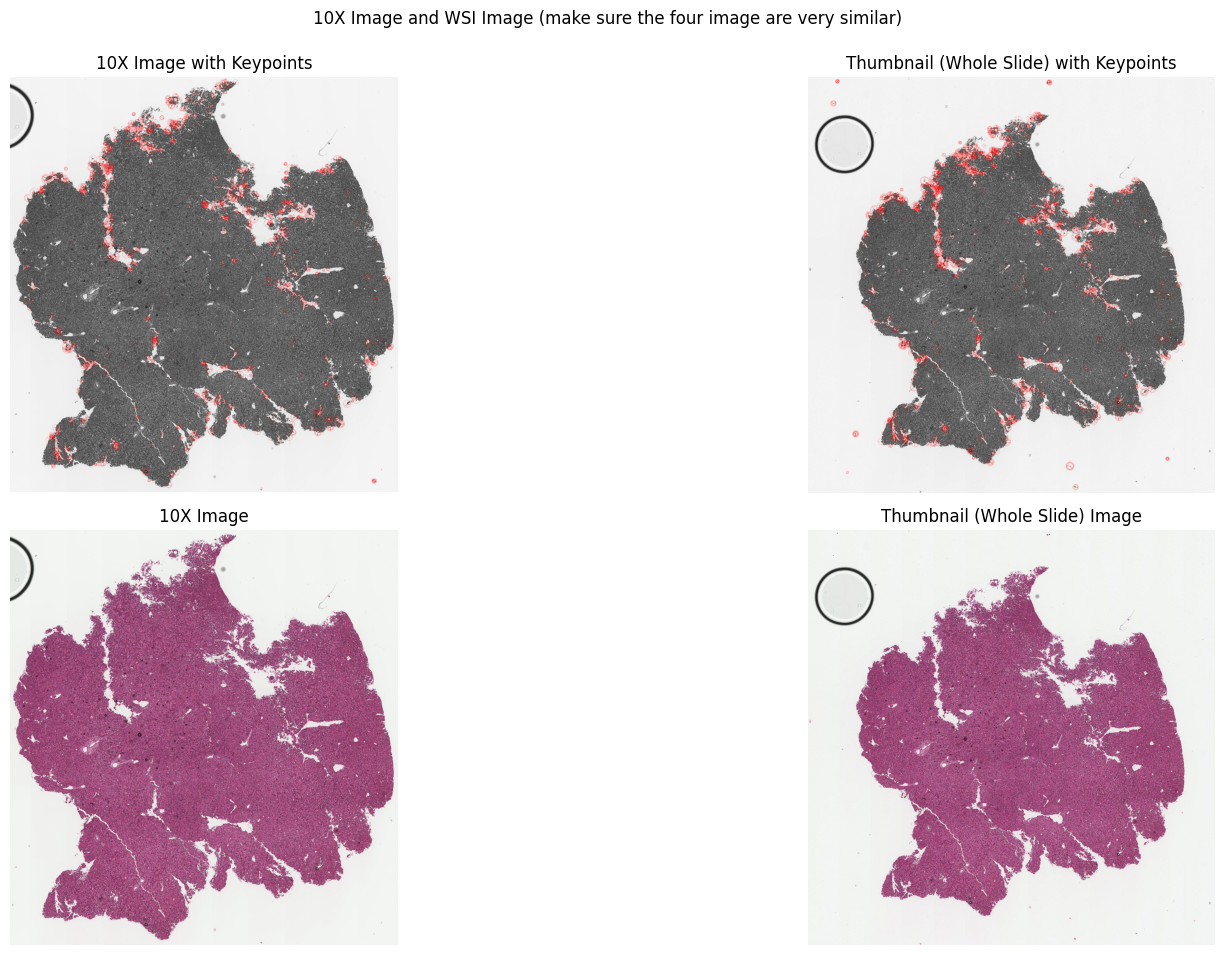

In [15]:
img_key = [k for k in adata.uns['spatial'].keys()][0]
adata_image_from_h5ad = adata.uns['spatial'][img_key]['images']['hires']
# Normalize to 0-255 range
normalized_image = ((adata_image_from_h5ad - adata_image_from_h5ad.min()) * 255.0 /
                   (adata_image_from_h5ad.max() - adata_image_from_h5ad.min()))
# Convert to uint8
uint8_image = normalized_image.astype(np.uint8)

# If needed, reshape to remove singleton dimensions
if uint8_image.shape[0] == 1 and uint8_image.shape[1] == 1:
    uint8_image = uint8_image.squeeze()

# Now convert to PIL Image
adata_image = Image.fromarray(uint8_image)


# very small subset need the high resolution histology image
slide = openslide.OpenSlide(slide_f)
slide_thumbnail = slide.get_thumbnail(

    (adata_image.width, adata_image.height)
)



adata_image_array = np.array(adata_image)
adata_image_array_gray = rgb2gray(adata_image)
thumbnail_array_gray = rgb2gray(slide_thumbnail)

# Our images are already in grayscale, but let's ensure they're in the right format for OpenCV
adata_gray = (adata_image_array_gray * 255).astype(np.uint8)
thumbnail_gray = (thumbnail_array_gray * 255).astype(np.uint8)

# Detect ORB features and compute descriptors
MAX_NUM_FEATURES = 2000  # Increased for more features
orb = cv2.ORB_create(MAX_NUM_FEATURES)
keypoints1, descriptors1 = orb.detectAndCompute(adata_gray, None)
keypoints2, descriptors2 = orb.detectAndCompute(thumbnail_gray, None)

# Draw keypoints on images
adata_display = cv2.drawKeypoints(adata_gray, keypoints1,
                                 outImage=np.array([]),
                                 color=(255, 0, 0),
                                 flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

thumbnail_display = cv2.drawKeypoints(thumbnail_gray, keypoints2,
                                    outImage=np.array([]),
                                    color=(255, 0, 0),
                                    flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# Display Images with keypoints
plt.figure(figsize=[20, 10])
plt.subplot(2, 2, 1)
plt.axis("off")
plt.imshow(adata_display, cmap='gray')
plt.title("10X Image with Keypoints")

plt.subplot(2, 2, 2)
plt.axis("off")
plt.imshow(thumbnail_display, cmap='gray')
plt.title("Thumbnail (Whole Slide) with Keypoints")

plt.subplot(2, 2, 3)
plt.axis("off")
plt.imshow(adata_image)
plt.title("10X Image")

plt.subplot(2, 2, 4)
plt.axis("off")
plt.imshow(slide_thumbnail)
plt.title("Thumbnail (Whole Slide) Image")

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.suptitle("10X Image and WSI Image (make sure the four image are very similar)")
plt.show()

In [7]:

# Match features
matcher = cv2.DescriptorMatcher_create(cv2.DESCRIPTOR_MATCHER_BRUTEFORCE_HAMMING)
matches = list(matcher.match(descriptors1, descriptors2, None))

# Sort matches by score
matches.sort(key=lambda x: x.distance, reverse=False)

# Remove not so good matches - keep top 10%
numGoodMatches = int(len(matches) * 0.1)
matches = matches[:numGoodMatches]

# Draw top matches



im_matches = cv2.drawMatches(adata_gray, keypoints1,
                thumbnail_gray, keypoints2,
                matches, None,
                flags=cv2.DrawMatchesFlags_DEFAULT,
                # matchColor=(0, 0, 255),
                )
# Display matches
plt.figure(figsize=[40, 10])
plt.imshow(im_matches, cmap='gray', alpha=0.98)
plt.axis("off")
plt.title("Feature Matches Between Images")
plt.show()
# Extract location of good matches
points1 = np.zeros((len(matches), 2), dtype=np.float32)
points2 = np.zeros((len(matches), 2), dtype=np.float32)

for i, match in enumerate(matches):
   points1[i, :] = keypoints1[match.queryIdx].pt
   points2[i, :] = keypoints2[match.trainIdx].pt

# Find homography
h, mask = cv2.findHomography(points2, points1, cv2.RANSAC)

# Warp thumbnail to align with high-res image
height, width = adata_gray.shape
thumbnail_aligned = cv2.warpPerspective(thumbnail_gray, h, (width, height))

# Display results
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].imshow(adata_gray, cmap='gray')
ax[0].set_title('High-res Image')
ax[1].imshow(thumbnail_gray, cmap='gray')
ax[1].set_title('Histology Image')
ax[2].imshow(thumbnail_aligned, cmap='gray')
ax[2].set_title('Aligned Histology')
plt.show()

print("Homography matrix:")
print(h)
process_tile = ProcessTile(
    slide_f=histology_f,
)
analyze_folder = process_tile.analyze_folder

boundary_predictions_folder = analyze_folder / 'nucleus_predictions'
tiles_folder = analyze_folder / f'{analyze_folder.stem}_tiles'
debug_folder = analyze_folder / 'nucleus_predictions_debug'
map_cell_boundary_from_ultra_high_res_histology_to_adata.get_res_min_max_from_annotation_folder_files(boundary_predictions_folder)
map_cell_boundary_from_ultra_high_res_histology_to_adata.get_res_min_max_from_annotation_folder_files(tiles_folder)
# map_cell_boundary_from_ultra_high_res_histology_to_adata.get_res_min_max_from_annotation_folder_files(debug_folder,)
map_boundary_to_adata = map_cell_boundary_from_ultra_high_res_histology_to_adata(
    analyze_folder=analyze_folder,
    slide=slide,
    # slide_thumbnail=slide_thumbnail,
)

new_obs_column = 'cell_bounds'
default_value = 'not_detected'


adata.obs[new_obs_column] = default_value
# adata.obs['cell_bounds'] = 'not_detected'

map_cell_boundary_from_ultra_high_res_histology_to_adata.transfer_high_res_boundary_to_adata_obs_cell_bounds(

    *map_boundary_to_adata.one_example_tile_boundary_with_tile(idx=10),
    slide=slide,
    slide_thumbnail=slide_thumbnail,
    adata=adata,
    adata_image=adata_image,
    homoglaphy_matrix=h,
    new_obs_cell_bounds_variable_name=new_obs_column,
    default_cell_bounds=default_value,

)

boundary_files, tile_files = map_boundary_to_adata.get_all_boundary_tile_files()
# boundary_files, tile_files

map_cell_boundary_from_ultra_high_res_histology_to_adata.transfer_mutliple_high_res_boundary_to_adata_obs_cell_bounds(

    boundary_files,
    tile_files,
    slide,
    slide_thumbnail,
    adata,
    adata_image,
    h,
    save_adata_folder=analyze_folder,
    save_adata_suffix=elvin_fl3.out_10x_name,
    new_obs_cell_bounds_variable_name=new_obs_column,
    default_cell_bounds=default_value,
    plot_comprehensively_count=5,
    save_comprehensively_folder=analyze_folder / 'cell_bounds_plots_comprehensive_debug',
    force=True,
    # debug=True,
)

NameError: name 'descriptors1' is not defined